* Nama          : M. Eric Chaniago
* Email         : akkitherythm@gmail.com
* ID Dicoding   : 

# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

#### **Dataset: Beverage Sales**

**Deskripsi** <br>
Dataset ini dibuat untuk mensimulasikan pola penjualan yang realistis dalam industri minuman, dengan menyoroti faktor-faktor penting seperti preferensi regional, fluktuasi musiman, dan segmentasi pelanggan. Dataset ini mencakup transaksi **Business-to-Business (B2B)** dan **Business-to-Consumer (B2C)**, sehingga dapat digunakan untuk berbagai analisis. <br><br>

**Fitur Dataset**
| Nama Fitur     | Deskripsi |
|---------------|-----------|
| `Order_ID`     | ID unik untuk setiap pesanan, yang mengelompokkan beberapa produk dalam satu pesanan. |
| `Customer_ID`  | ID unik untuk setiap pelanggan, membedakan pembeli individu. |
| `Customer_Type`| Jenis pelanggan, apakah **B2B** (bisnis ke bisnis) atau **B2C** (bisnis ke konsumen). |
| `Product`      | Nama produk yang dibeli, seperti "Coca-Cola" atau "Erdinger Weißbier". |
| `Category`     | Kategori produk, seperti "Soft Drinks" atau "Alcoholic Beverages". |
| `Unit_Price`   | Harga per unit dari produk. |
| `Quantity`     | Jumlah unit produk yang dibeli dalam pesanan tersebut. |
| `Discount`     | Diskon yang diberikan pada produk (misalnya 0.1 untuk 10%). Diskon hanya diberikan kepada pelanggan **B2B**. |
| `Total_Price`  | Total harga produk setelah diskon diterapkan. |
| `Region`       | Wilayah tempat pelanggan berada, seperti "Bayern" atau "Berlin". |
| `Order_Date`   | Tanggal pesanan dibuat. |

**Sumber Dataset**
Dataset ini diperoleh dari Kaggle:  
🔗 [Beverage Sales Dataset - Kaggle](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [8]:
# Data Manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Data Preprocessing
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
)

# Clustering Evaluation
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Clustering Algorithms
from sklearn.cluster import KMeans

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [9]:
df_sales1 = pd.read_csv("Dataset_clustering.csv")
df_sales1.head(5)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### **1. Memahami Struktur Data**

In [10]:
df_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [106]:
# Shrinking the dataset
df_sales = df_sales1.sample(n=10000, random_state=69, ignore_index=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


**Insight**
- Jumlah Data: 8.999.910 baris, 11 kolom.  
- Numerikal (4): `Unit_Price`, `Quantity`, `Discount`, `Total_Price`.  
- Kategorikal (7): `Order_ID`, `Customer_ID`, `Customer_Type`, `Product`, `Category`, `Region`, `Order_Date`.  

#### **2. Menangani Missing Value**

In [12]:
# Check Missing Value
print("Sum Of Missing Value:")
df_sales.isnull().sum()

Sum Of Missing Value:


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

**Insight**
- Dataframes tidak memiliki nilai yang hilang, artinya datanya cukup bersih dan bsia masuk ke proses selanjutnya

#### **3. Analisis Distribusi dan Korelasi**

In [13]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [14]:
print("📊 DESCRIPTIVE STATISTICS")
df_sales.describe().style.background_gradient(cmap='Blues')

📊 DESCRIPTIVE STATISTICS


,Unit_Price,Quantity,Discount,Total_Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.641282,23.310500,0.030600,127.033556
std,14.062028,27.034847,0.045319,482.093023
min,0.330000,1.000000,0.000000,0.380000
25%,1.060000,6.000000,0.000000,8.460000
50%,1.790000,11.000000,0.000000,21.200000
75%,3.150000,31.000000,0.050000,70.262500
max,144.470000,100.000000,0.150000,10858.750000


📈 DISTRIBUTION VISUALIZATION: HISTOGRAMS


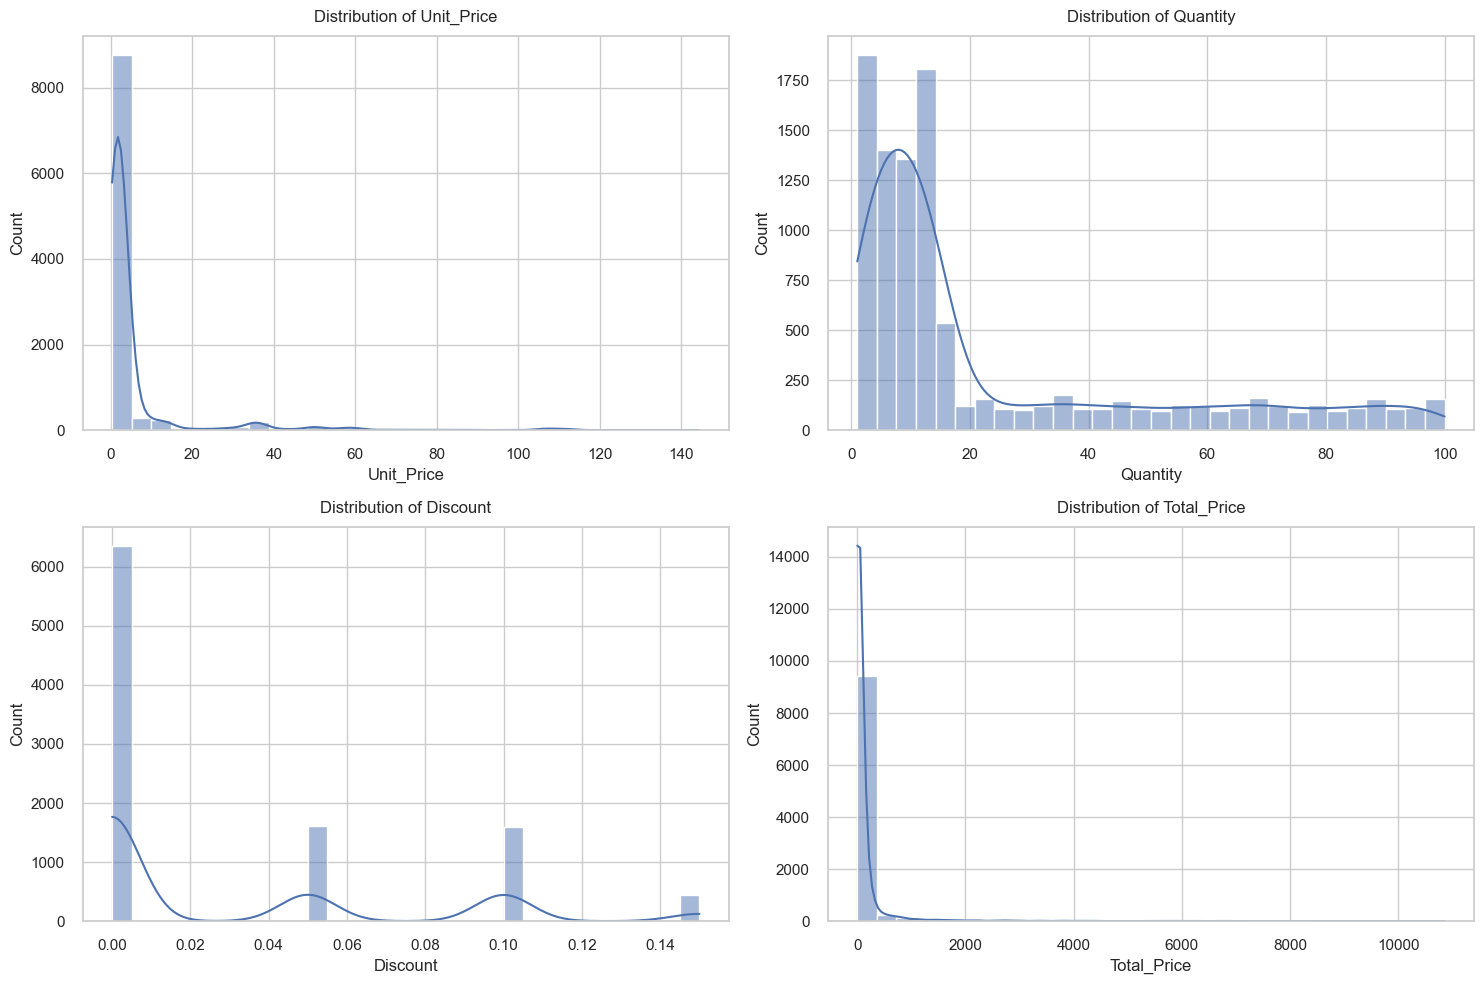

In [15]:
print("📈 DISTRIBUTION VISUALIZATION: HISTOGRAMS")
num_cols = df_sales.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_sales, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', pad=10)
    
plt.tight_layout()
plt.show()

📦 DISTRIBUTION VISUALIZATION: BOXPLOTS


C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\142114976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\142114976.py:6:

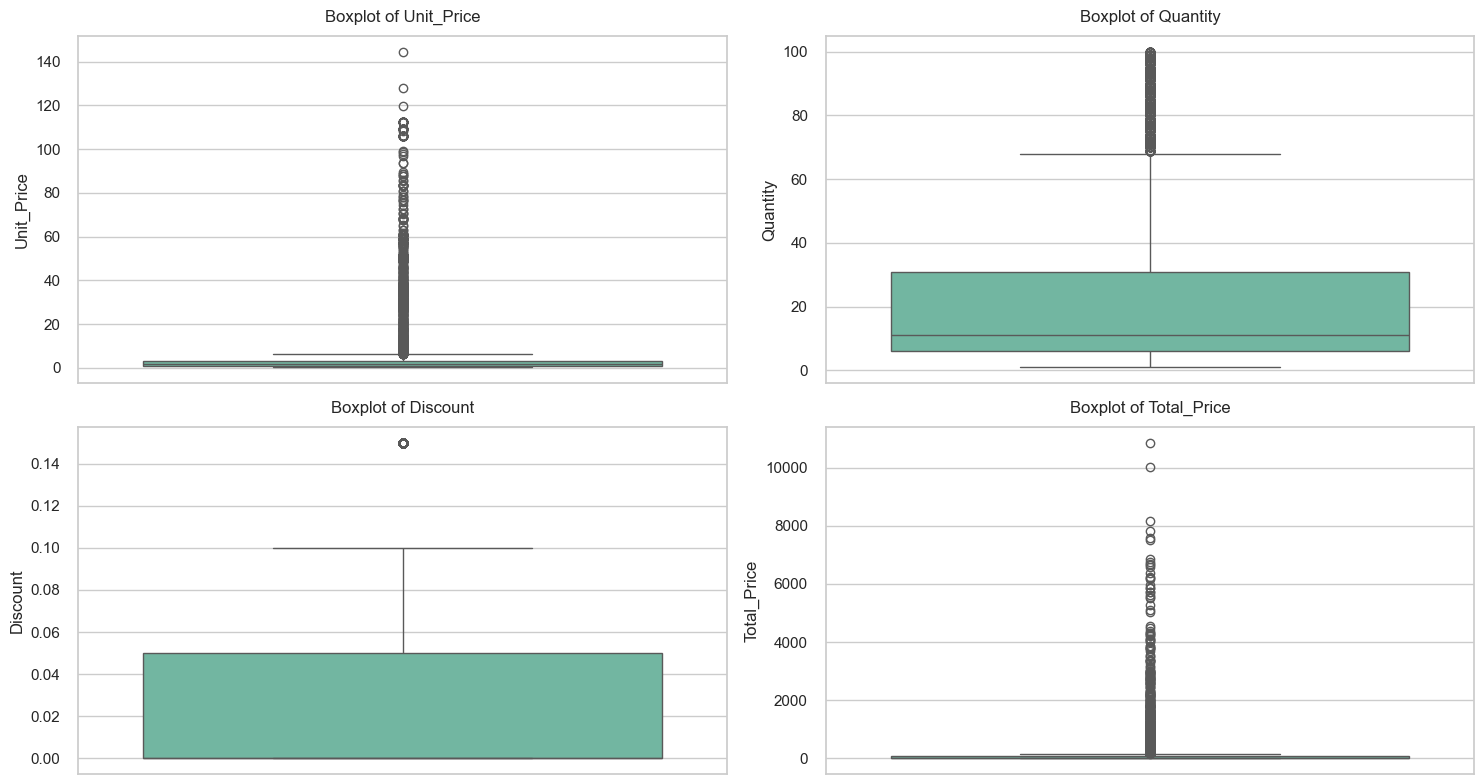

In [16]:
print("📦 DISTRIBUTION VISUALIZATION: BOXPLOTS")
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_sales, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}', pad=10)
    
plt.tight_layout()
plt.show()

🔗 CORRELATION MATRIX


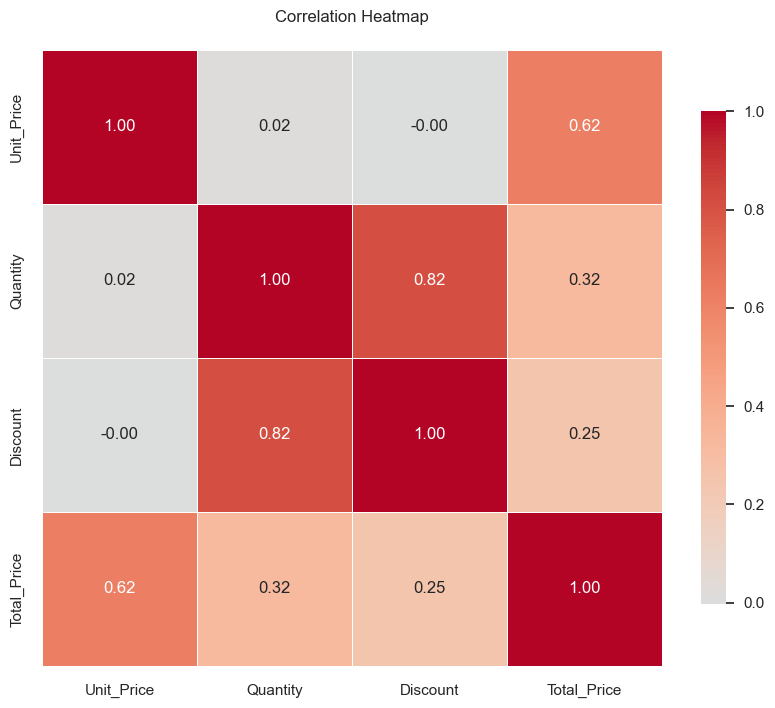

In [17]:
print("🔗 CORRELATION MATRIX")
corr_matrix = df_sales[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', pad=20)
plt.show()

🔄 PAIRWISE RELATIONSHIPS


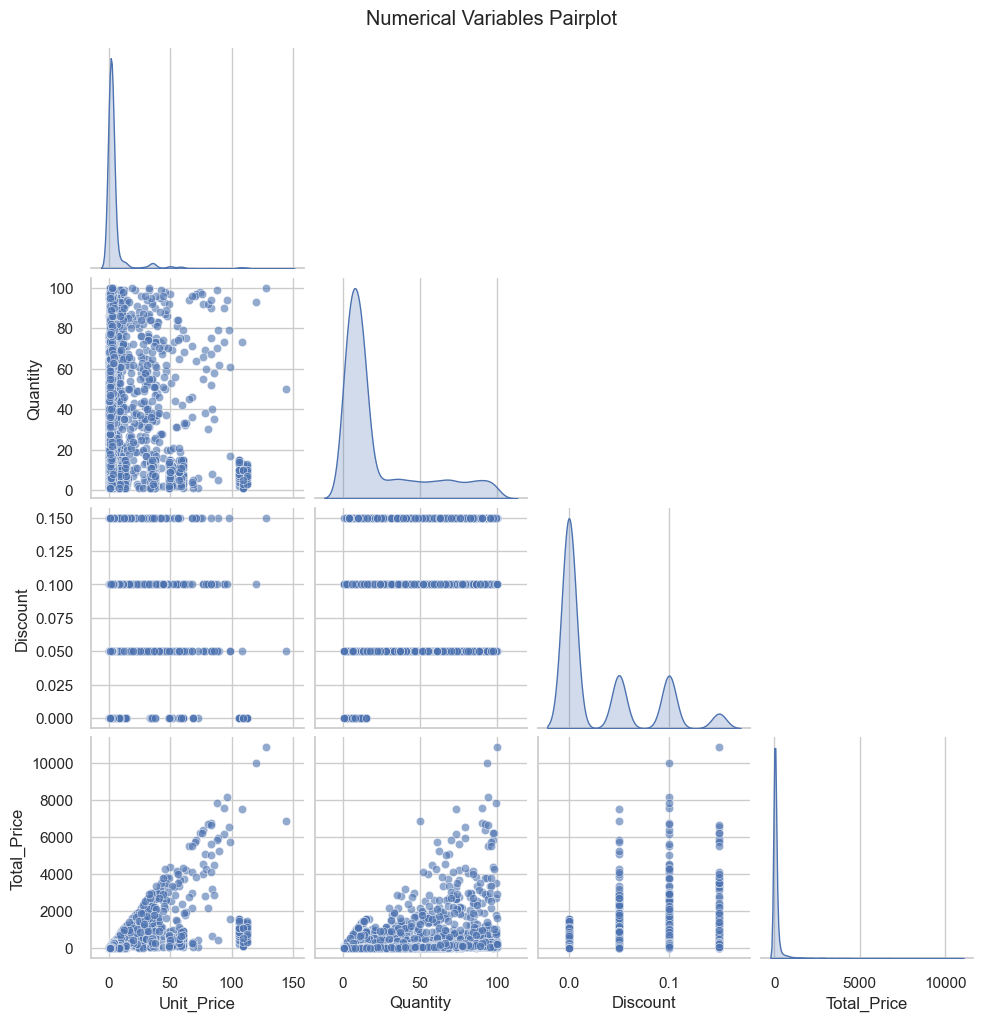

In [18]:
print("🔄 PAIRWISE RELATIONSHIPS")
sns.pairplot(df_sales[num_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Numerical Variables Pairplot', y=1.02)
plt.show()

#### **4. Visualisasi Data**

In [19]:
# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [20]:
print("📋 CATEGORICAL VARIABLES SUMMARY")
cat_cols = ['Customer_Type', 'Product', 'Category', 'Region']

# Display value counts for each categorical column
for col in cat_cols:
    print(f"\n🔍 {col} Distribution:")
    display(df_sales[col].value_counts().to_frame().style.background_gradient(cmap='Blues'))

📋 CATEGORICAL VARIABLES SUMMARY

🔍 Customer_Type Distribution:


,count
Customer_Type,
B2C,6358
B2B,3642



🔍 Product Distribution:


,count
Product,
Passion Fruit Juice,404
Granini Apple,401
Hohes C Orange,387
Tomato Juice,361
Mango Juice,347
Rauch Multivitamin,345
Cranberry Juice,339
Gerolsteiner,301
San Pellegrino,297



🔍 Category Distribution:


,count
Category,
Juices,2584
Water,2483
Alcoholic Beverages,2472
Soft Drinks,2461



🔍 Region Distribution:


,count
Region,
Schleswig-Holstein,659
Rheinland-Pfalz,654
Niedersachsen,649
Saarland,646
Hamburg,641
Sachsen,636
Thüringen,633
Bayern,631
Nordrhein-Westfalen,630


📊 CATEGORICAL DISTRIBUTION (COUNT PLOTS)


C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\AppData\Local\Temp\ipykernel_9880\1726555896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
C:\Users\akkit\A

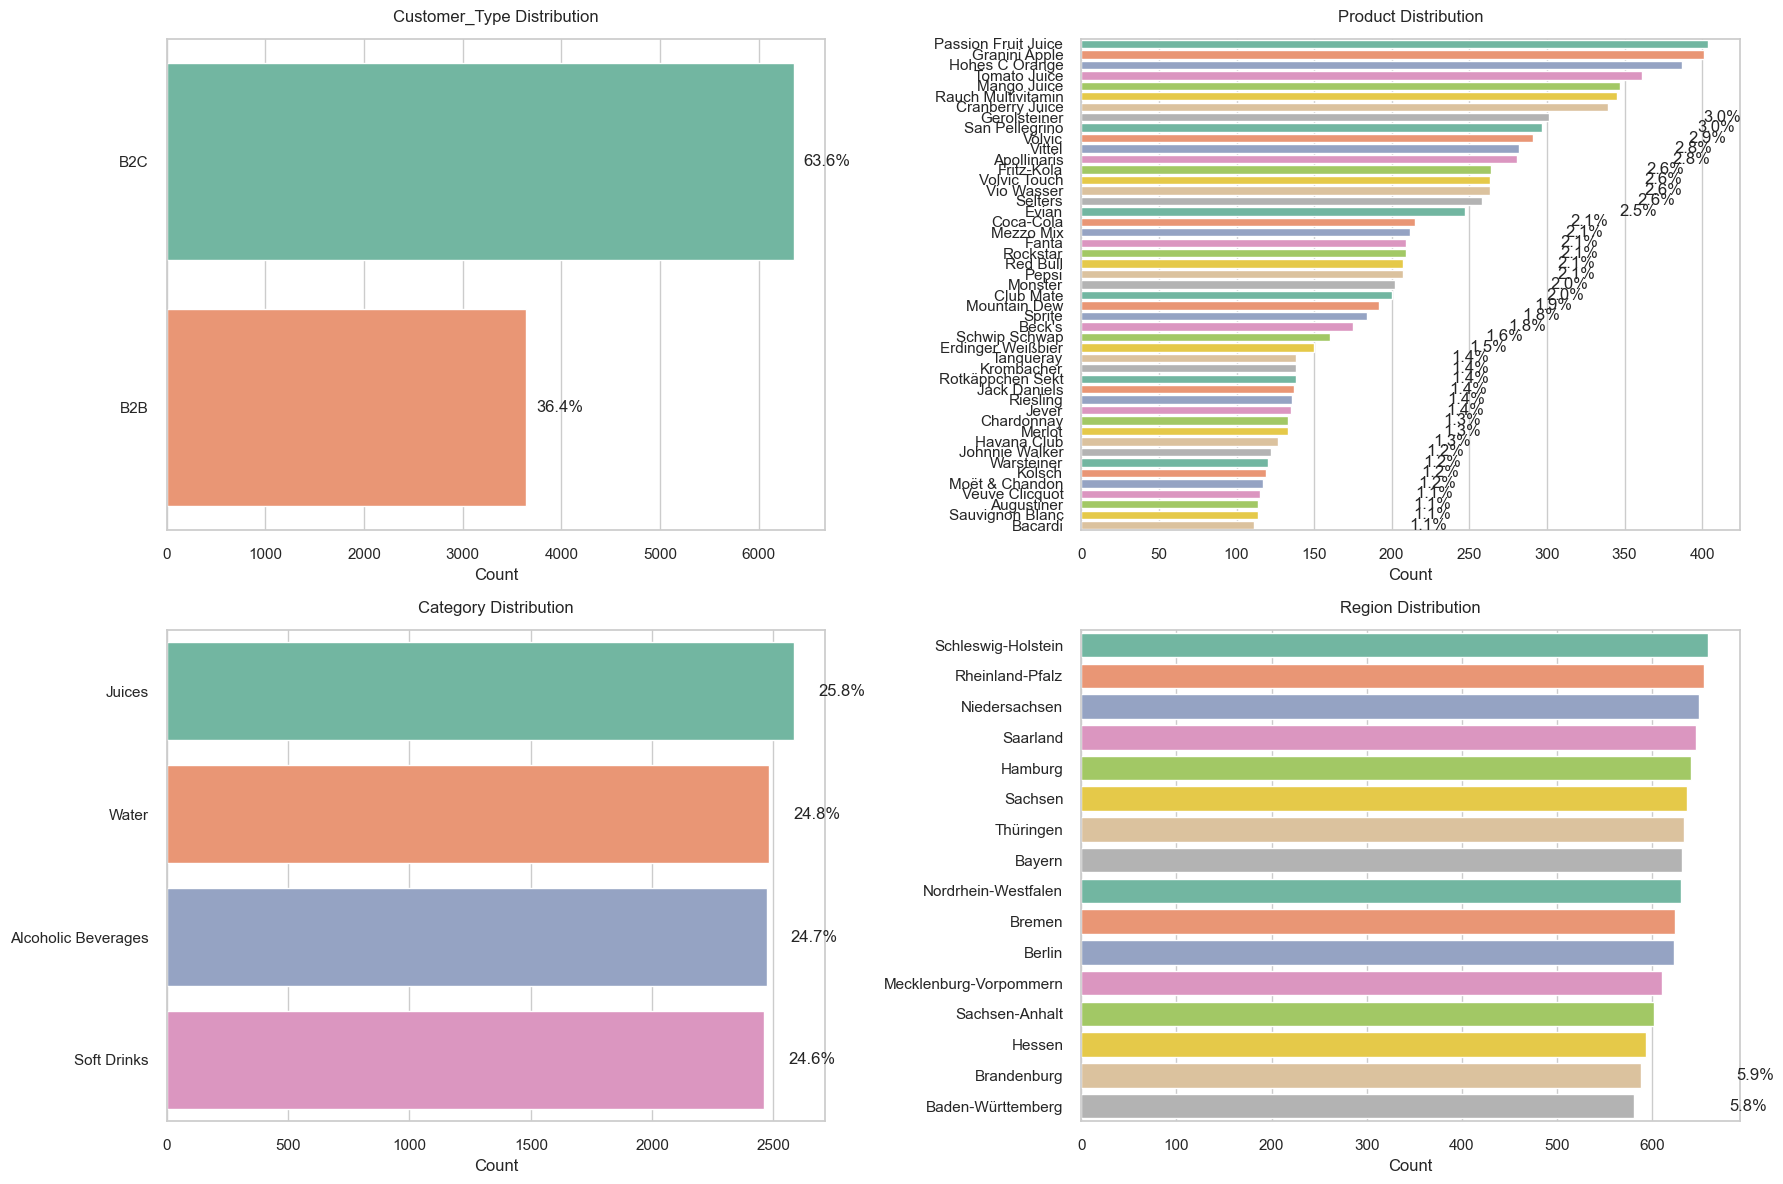

In [21]:
print("📊 CATEGORICAL DISTRIBUTION (COUNT PLOTS)")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    order = df_sales[col].value_counts().index
    sns.countplot(data=df_sales, y=col, ax=axes[i], order=order, palette='Set2')
    axes[i].set_title(f'{col} Distribution', pad=12)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    
    # Add percentage annotations
    total = len(df_sales)
    for p in axes[i].patches:
        percentage = f'{100 * p.get_width()/total:.1f}%'
        x = p.get_width() + total*0.01
        y = p.get_y() + p.get_height()/2
        axes[i].annotate(percentage, (x, y), va='center')
    
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### **1. Menangani Missing Value**

In [22]:
# Check missing values
print("\n🔍 Missing Values:")
display(df_sales.isnull().sum())


🔍 Missing Values:


Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

**Insight**
- Tidak terdapat missing value pada dataframe, sehingga lanjyt ke proses berikutnya

#### **2. Menangani Data Duplikat**

In [107]:
print("🔎 Checking for duplicates...")
duplicate_count = df_sales.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows")

🔎 Checking for duplicates...
Found 0 duplicate rows


**Insight**
- Tidak terdapat baris data yang duplikat, maka tidak ada yang perlu dihapus. Lanjut ke tahap berikutnya

#### **3. Binning**

In [118]:
df_sales['Quantity_Category'] = pd.cut(
    df_sales['Quantity'], 
    bins=[0, 5, 10, 50, df_sales['Quantity'].max()],  # Menambahkan batas atas
    labels=['Low', 'Medium', 'High', 'Very High'],  # Menyesuaikan label
    include_lowest=True
)

In [109]:
df_sales

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7,0.00,7.28,Bremen,2021-02-17,Medium
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46,0.10,29.39,Sachsen-Anhalt,2023-04-15,High
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,73,0.05,201.11,Sachsen,2022-06-20,Very High
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30,0.05,76.38,Schleswig-Holstein,2021-09-07,High
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3,0.00,2.73,Hessen,2023-04-28,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD2544415,CUS8327,B2C,Jack Daniels,Alcoholic Beverages,48.79,2,0.00,97.58,Baden-Württemberg,2021-08-10,Low
9996,ORD1677872,CUS8686,B2C,Hohes C Orange,Juices,1.75,15,0.00,26.25,Hessen,2021-04-05,High
9997,ORD2596152,CUS6995,B2C,Fanta,Soft Drinks,1.16,1,0.00,1.16,Berlin,2021-04-13,Low
9998,ORD2184216,CUS5801,B2B,Fanta,Soft Drinks,1.00,18,0.05,17.10,Niedersachsen,2022-06-12,High


#### **3. Normalisasi dan Standarisasi**

In [119]:
# Initialize scalers
min_max_scaler = MinMaxScaler()  # For normalization (scaling to [0,1] range)
standard_scaler = StandardScaler()  # For standardization (mean=0, std=1)

In [120]:
# Apply MinMax normalization to 'Quantity' column
df_sales_normalized = df_sales.copy()
df_sales_normalized[['Quantity']] = min_max_scaler.fit_transform(df_sales_normalized[['Quantity']])
df_sales_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17,Medium
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15,High
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20,Very High
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07,High
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28,Low


In [121]:
# Apply Standard scaling to price columns
df_standardized = df_sales_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.327230,0.060606,0.00,-0.248416,Bremen,2021-02-17,Medium
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.350698,0.454545,0.10,-0.202551,Sachsen-Anhalt,2023-04-15,High
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.194952,0.727273,0.05,0.153664,Sachsen,2022-06-20,Very High
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.210598,0.292929,0.05,-0.105075,Schleswig-Holstein,2021-09-07,High
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.336475,0.020202,0.00,-0.257854,Hessen,2023-04-28,Low


**Insight**
- Dilakukan MinMax Normalization pada kolom `quantity`
- Pada kolom `Total_Price` dan `Unit_Price` dilakukan standarisasi

#### **4. Deteksi dan Penanganan Outlier**

In [122]:
df_cleaned = df_standardized.copy()
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 
                 'Total_Price']

📊 Detecting outliers...


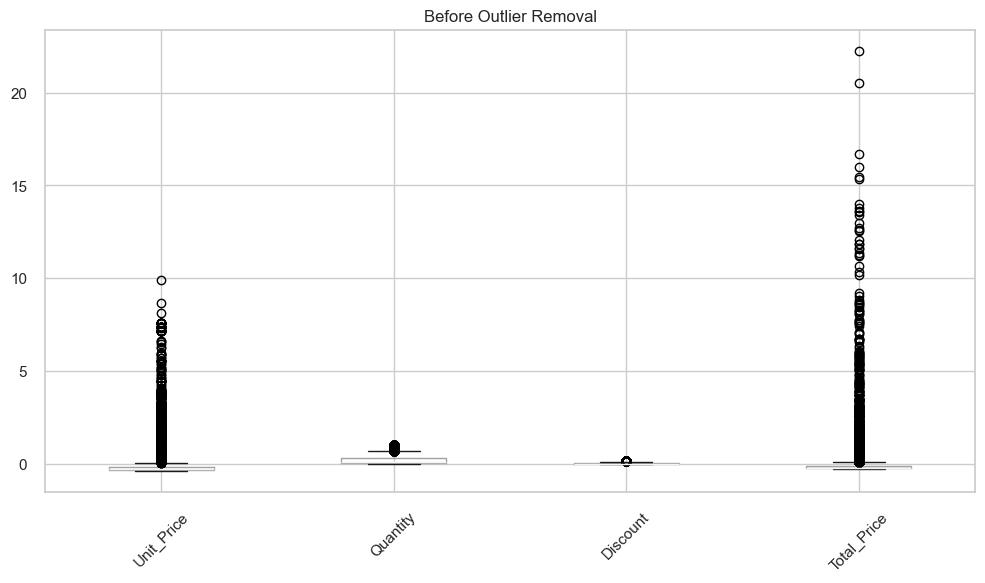

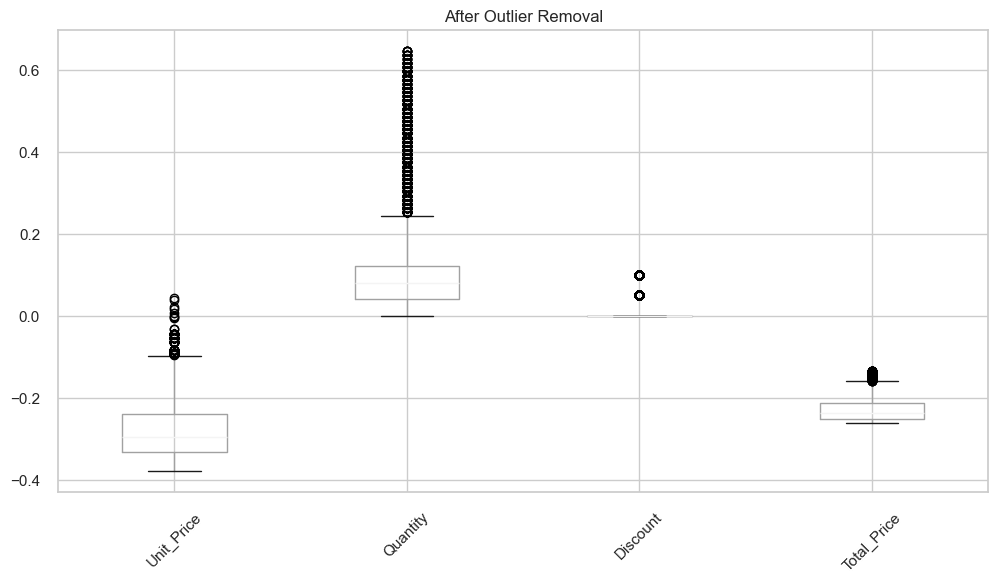

✅ Outliers removed using IQR filtering method


In [123]:
# OUTLIER DETECTION & REMOVAL
# ===========================
print("📊 Detecting outliers...")

# Before treatment
plt.figure(figsize=(12,6))
df_cleaned[numerical_cols].boxplot()
plt.title('Before Outlier Removal')
plt.xticks(rotation=45)
plt.show()

# IQR Method - Removing Outliers
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hapus baris yang memiliki outlier di kolom ini
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# After treatment
plt.figure(figsize=(12,6))
df_cleaned[numerical_cols].boxplot()
plt.title('After Outlier Removal')
plt.xticks(rotation=45)
plt.show()

print("✅ Outliers removed using IQR filtering method")


**Insight**
- Sebelum outlier treatment, Total_Price memiliki banyak outlier ekstrem yang mendominasi skala.
- Setelah outlier treatment, distribusi data lebih seimbang dan skala antar variabel lebih seragam.

#### **5. Encoding Data Kategorik**

In [131]:
# Inisialisasi label encoder
label_encoder = LabelEncoder()

df_labeled = df_cleaned.copy()

# Label Encoding
df_labeled[['Customer_Type', 'Region', 'Product', 'Quantity_Category']] = df_cleaned[['Customer_Type', 'Region', 'Product', 'Quantity_Category']].apply(label_encoder.fit_transform)

# One Hot Encoding
df_encoded = pd.get_dummies(df_labeled, columns=['Category'])
df_encoded.head()

,Order_ID,Customer_ID,Customer_Type,Product,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,ORD697566,CUS6363,1,5,-0.327230,0.060606,0.0,-0.248416,4,2021-02-17,2,False,False,True,False
1,ORD1118443,CUS7797,0,32,-0.350698,0.454545,0.1,-0.202551,13,2023-04-15,0,False,False,False,True
4,ORD562794,CUS4090,1,29,-0.336475,0.020202,0.0,-0.257854,6,2023-04-28,1,False,False,False,True
5,ORD2320519,CUS5936,1,2,-0.300916,0.030303,0.0,-0.251818,4,2023-11-01,1,True,False,False,False
6,ORD727051,CUS1935,1,29,-0.340031,0.020202,0.0,-0.258165,2,2021-02-23,1,False,False,False,True


**Insight**
- Kolom `Category`, `Region`, `Product` dikonversi ke angka menggunakan Label Encoding, sehingga setiap kategori diubah menjadi nilai numerik

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [125]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order_ID                      7000 non-null   object 
 1   Customer_ID                   7000 non-null   object 
 2   Customer_Type                 7000 non-null   int64  
 3   Product                       7000 non-null   int64  
 4   Unit_Price                    7000 non-null   float64
 5   Quantity                      7000 non-null   float64
 6   Discount                      7000 non-null   float64
 7   Total_Price                   7000 non-null   float64
 8   Region                        7000 non-null   int64  
 9   Order_Date                    7000 non-null   object 
 10  Quantity_Category             7000 non-null   int64  
 11  Category_Alcoholic Beverages  7000 non-null   bool   
 12  Category_Juices               7000 non-null   bool   
 13  Category

In [171]:
features = [
               'Unit_Price', 'Quantity', 'Discount', 
               'Category_Alcoholic Beverages', 'Category_Juices', 
               'Category_Soft Drinks', 'Category_Water'
          ]
X = df_encoded[features]
X

,Unit_Price,Quantity,Discount,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,-0.327230,0.060606,0.00,False,False,True,False
1,-0.350698,0.454545,0.10,False,False,False,True
4,-0.336475,0.020202,0.00,False,False,False,True
5,-0.300916,0.030303,0.00,True,False,False,False
6,-0.340031,0.020202,0.00,False,False,False,True
...,...,...,...,...,...,...,...
9994,-0.282426,0.393939,0.10,True,False,False,False
9996,-0.276737,0.141414,0.00,False,True,False,False
9997,-0.318696,0.000000,0.00,False,False,True,False
9998,-0.330074,0.171717,0.05,False,False,True,False


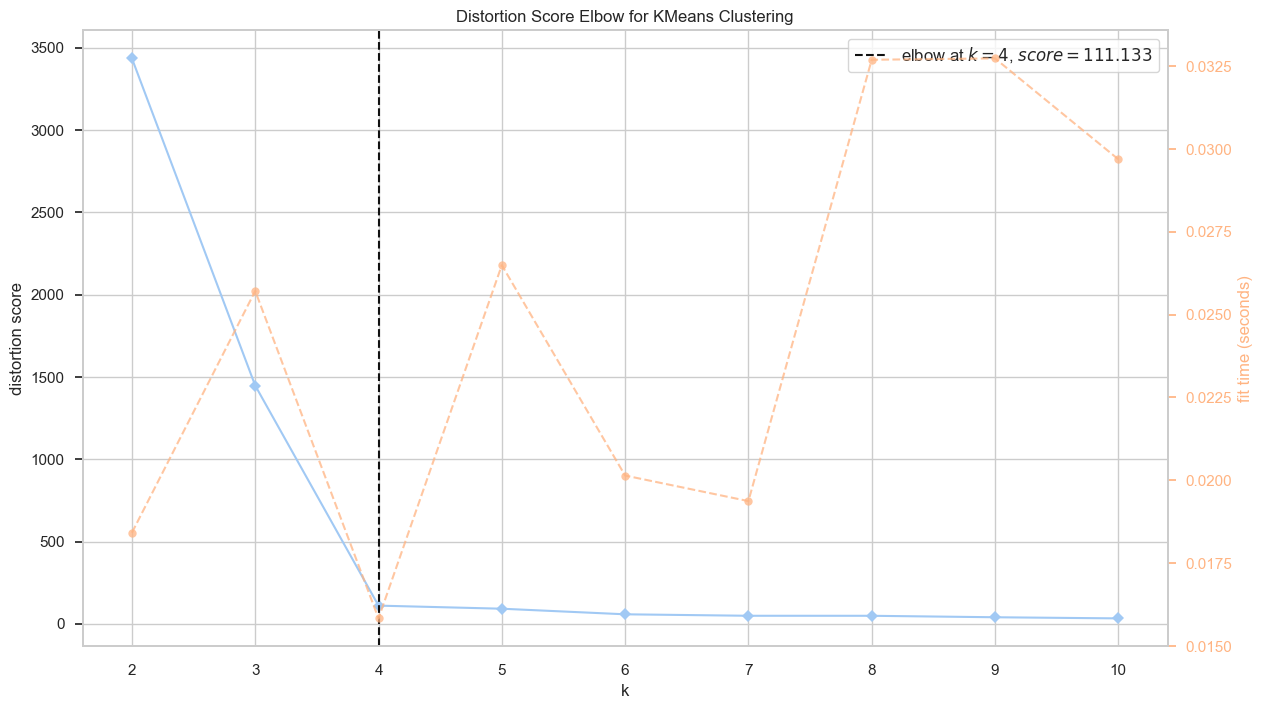

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [173]:
# Kurangi dimensi data menjadi 2 dengan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [174]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(4), random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [199]:
# Disini saya melakukan 'Hitung Silhouette Score'
sil_score = silhouette_score(X_pca, kmeans.labels_)
prefs = print(f'Silhouette Score for K={optimal_k}: {sil_score}')

Silhouette Score for K=4: 0.9914752660596179


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [176]:
selector = VarianceThreshold(threshold=0.01)
X_vt = selector.fit_transform(X)

# Mendapatkan variansi setiap fitur
variances = pd.Series(selector.variances_, index=X.columns)

# Menampilkan variansi tiap fitur
print("Variansi tiap fitur:")
print(variances)

# Memilih fitur yang memenuhi threshold
selected_features = X.columns[selector.get_support()]
print("\nFitur yang dipilih:", list(selected_features))

Variansi tiap fitur:
Unit_Price                      0.005351
Quantity                        0.012217
Discount                        0.000792
Category_Alcoholic Beverages    0.123569
Category_Juices                 0.200016
Category_Soft Drinks            0.202039
Category_Water                  0.209254
dtype: float64

Fitur yang dipilih: ['Quantity', 'Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']


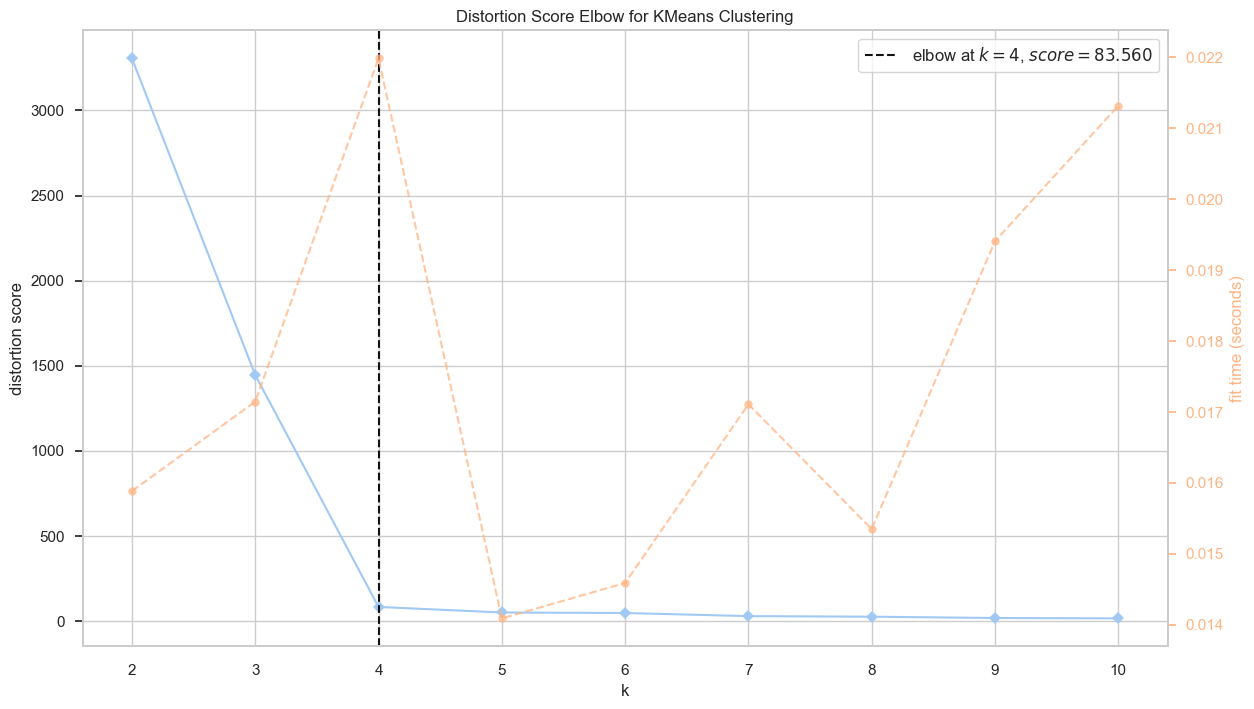

Untuk n_clusters = 4, Silhouette Score Setelah Feature Selection = 0.9294


In [177]:
# Menentukan jumlah cluster optimal dengan fitur yang telah dipilih
kmeans_vt = KMeans()
visualizer_vt = KElbowVisualizer(kmeans_vt, k=(2, 11))
visualizer_vt.fit(X_vt)
visualizer_vt.show()

# Ambil jumlah cluster optimal
optimal_k_vt = visualizer_vt.elbow_value_

# Gunakan PCA untuk reduksi dimensi
pca = PCA(n_components=5)
X_pca_vt = pca.fit_transform(X_vt)

# Lakukan clustering
kmeans_rfe = KMeans(n_clusters=optimal_k_vt, random_state=69, init='k-means++')
kmeans_rfe.fit(X_pca_vt)

# Evaluasi dengan Silhouette Score
silhouette_rfe = silhouette_score(X_pca_vt, kmeans_rfe.labels_)

print(f"Untuk n_clusters = {optimal_k_vt}, Silhouette Score Setelah Feature Selection = {silhouette_rfe:.4f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

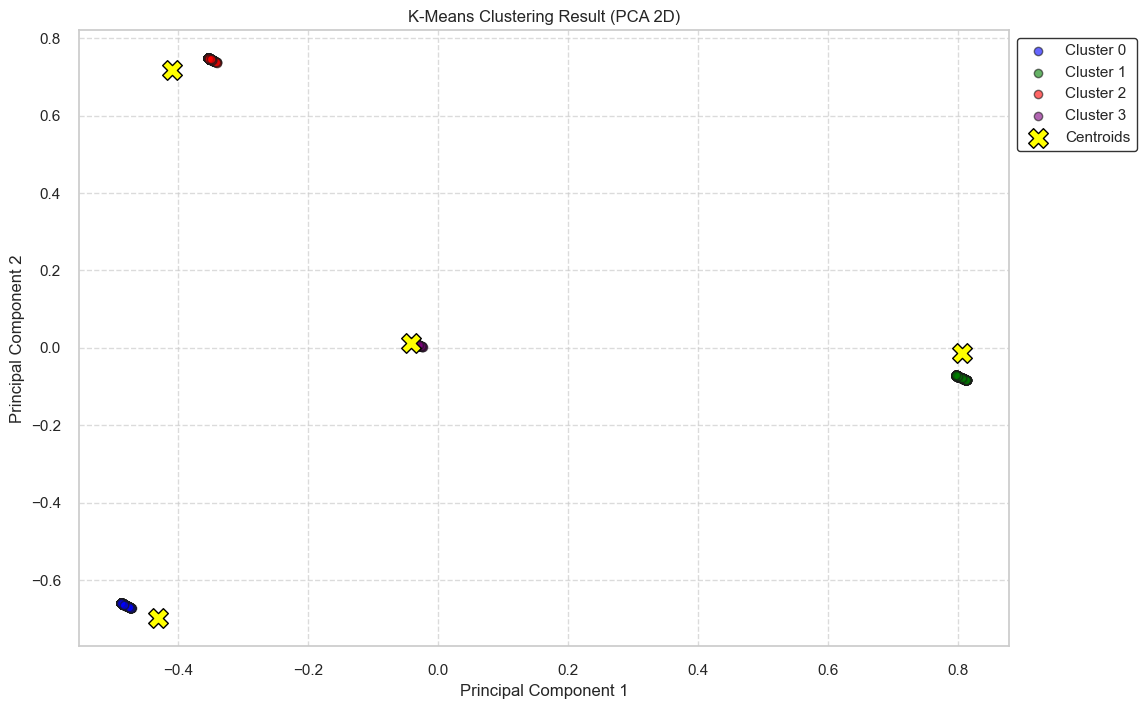

In [178]:
# Warna khusus untuk setiap cluster agar lebih jelas
colors = ['blue', 'green', 'red', 'purple']
labels = [f'Cluster {i}' for i in range(4)]

plt.figure(figsize=(12, 8))

# Loop untuk memplot setiap cluster dengan warna berbeda
for i in range(4):
    plt.scatter(X_pca_vt[kmeans.labels_ == i, 0], X_pca_vt[kmeans.labels_ == i, 1], 
                c=colors[i], label=labels[i], alpha=0.6, edgecolors='k')

# Plot centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='yellow', marker='X', s=200, label='Centroids', edgecolors='black')

plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [180]:
df_labeled = df_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.327230,0.060606,0.0,-0.248416,Bremen,2021-02-17,Medium,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.350698,0.454545,0.1,-0.202551,Sachsen-Anhalt,2023-04-15,High,1
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.336475,0.020202,0.0,-0.257854,Hessen,2023-04-28,Low,1
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.300916,0.030303,0.0,-0.251818,Bremen,2023-11-01,Low,3
6,ORD727051,CUS1935,B2C,San Pellegrino,Water,-0.340031,0.020202,0.0,-0.258165,Berlin,2021-02-23,Low,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [181]:
# Ubah kembali data numerik menjadi semula (sebelum dinormalisasi/standardisasi)
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.0,7.28,Bremen,2021-02-17,Medium,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.1,29.39,Sachsen-Anhalt,2023-04-15,High,1
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.0,2.73,Hessen,2023-04-28,Low,1
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.0,5.64,Bremen,2023-11-01,Low,3
6,ORD727051,CUS1935,B2C,San Pellegrino,Water,0.86,3.0,0.0,2.58,Berlin,2021-02-23,Low,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Cluster Distribution:
Cluster
0    1967
1    2087
2    1935
3    1011 

Total customers: 7000


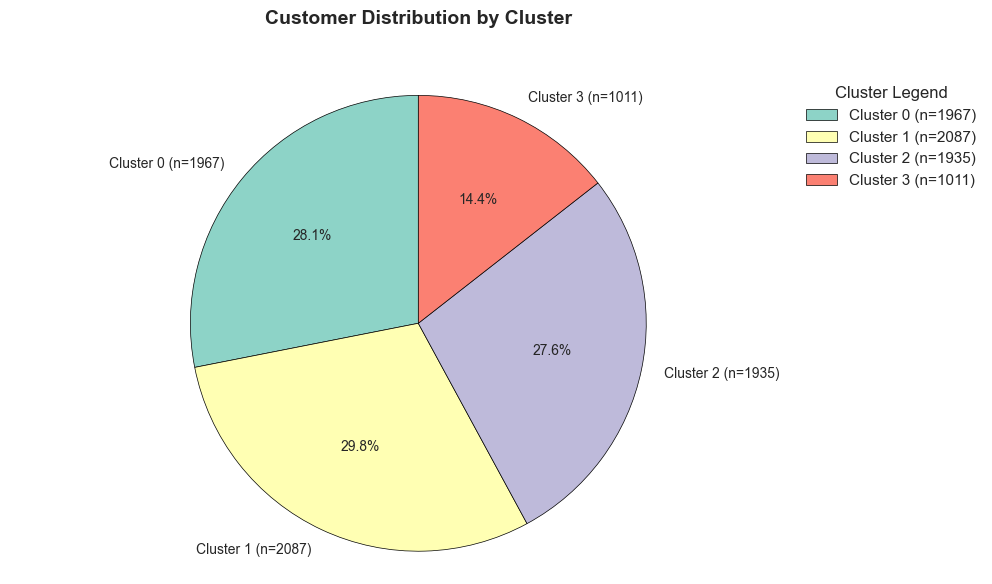

In [185]:
# 1. Calculate cluster distribution
# Sort by cluster index for consistent ordering
cluster_counts = df_labeled['Cluster'].value_counts().sort_index()

# Print cluster distribution with clear formatting
print("Cluster Distribution:")
print(cluster_counts.to_string(), "\n")  # to_string() for better formatting
print(f"Total customers: {cluster_counts.sum()}")

# 2. Create visualization
plt.figure(figsize=(10, 6))  # Set figure size

# Create pie chart with enhanced features
plt.pie(
    cluster_counts,
    labels=[f"Cluster {i} (n={count})" for i, count in cluster_counts.items()],  # Show cluster numbers and counts
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set3'),  # Use a distinct color palette
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},  # Add subtle borders
    textprops={'fontsize': 10}  # Adjust font size
)

# Add title and adjust layout
plt.title(
    'Customer Distribution by Cluster\n',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Add legend for better interpretation
plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.2, 1),
    title='Cluster Legend'
)

# Display the plot
plt.tight_layout()
plt.show()

In [193]:
# Calculate mean of numerical features for each cluster
cluster_stats = (df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean())

# Display results with basic formatting
display(cluster_stats.style.background_gradient(cmap='Blues'))

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.556151,11.651246,0.013981,16.031103
1,0.916617,13.591279,0.016794,11.081251
2,2.581922,9.362791,0.009173,22.615731
3,2.166983,10.383778,0.011029,19.621217


Customer Type Distribution by Cluster:

|   Cluster |   B2B |   B2C |
|----------:|------:|------:|
|         0 |   413 |  1554 |
|         1 |   512 |  1575 |
|         2 |   288 |  1647 |
|         3 |   183 |   828 | 



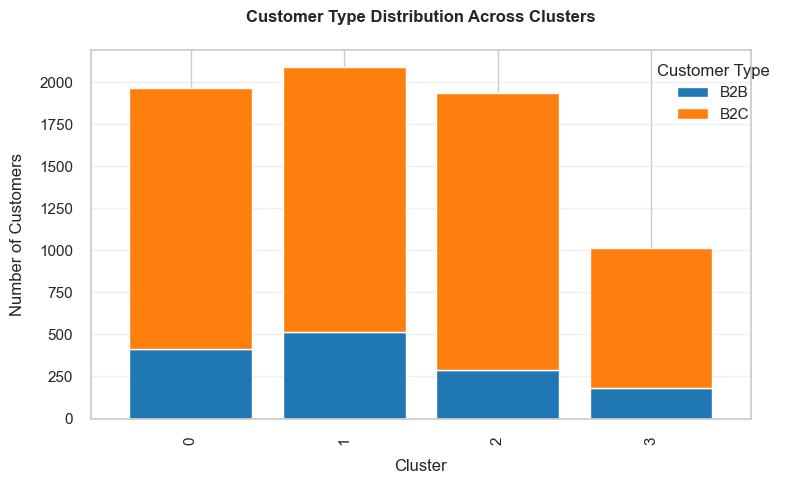

In [195]:
# Calculate customer type distribution across clusters
customer_dist = (
    df_labeled
    .groupby(['Cluster', 'Customer_Type'])
    .size()
    .unstack(fill_value=0)
)

# Print the distribution table
print("Customer Type Distribution by Cluster:\n")
print(customer_dist.to_markdown(), "\n")  # Using markdown for better table formatting

# Create stacked bar plot
ax = customer_dist.plot(
    kind='bar', 
    stacked=True,
    figsize=(8, 5),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Custom color palette
    edgecolor='white',
    width=0.8
)

# Format the plot
plt.title('Customer Type Distribution Across Clusters', pad=20, fontweight='bold')
plt.xlabel('Cluster', labelpad=10)
plt.ylabel('Number of Customers', labelpad=10)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

Product Category Distribution by Cluster:

Category  Alcoholic Beverages  Juices  Soft Drinks  Water
Cluster                                                  
0                           0       0         1967      0
1                           0       0            0   2087
2                           0    1935            0      0
3                        1011       0            0      0




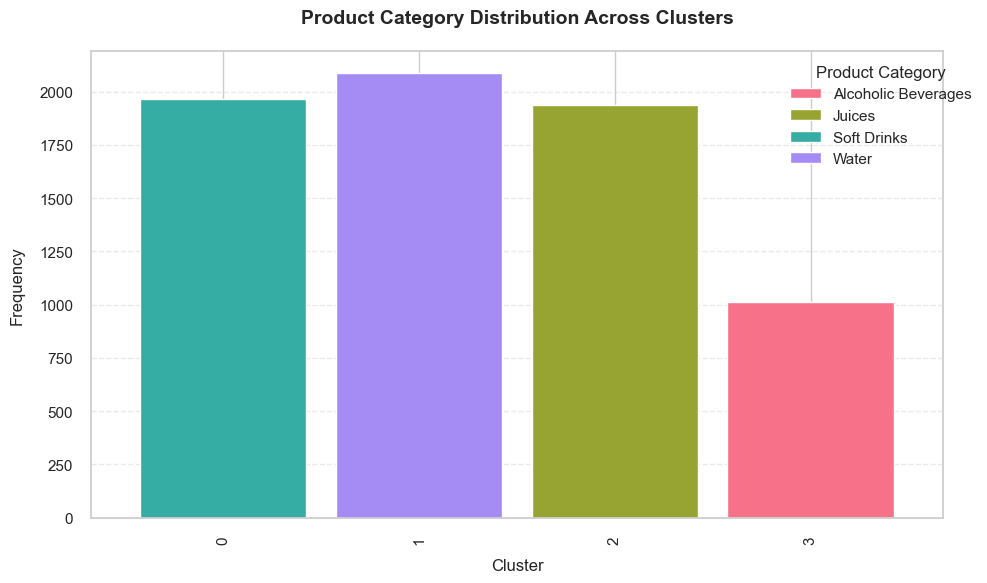

In [197]:
# Calculate product category distribution across clusters
category_dist = (
    df_labeled
    .groupby(['Cluster', 'Category'])
    .size()
    .unstack(fill_value=0)
)

# Print the distribution table
print("Product Category Distribution by Cluster:\n")
print(category_dist.to_string())  # Using to_string() for wider compatibility
print("\n")  # Add extra newline for spacing

# Create and customize the stacked bar plot
ax = category_dist.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=sns.color_palette("husl", len(category_dist.columns)),  # Use distinct colors
    edgecolor='white',
    width=0.85
)

# Enhance plot readability
plt.title('Product Category Distribution Across Clusters', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adjust layout and display
plt.tight_layout()
plt.show()

**Insight**
1. **Cluster 0**: Didominasi oleh pelanggan B2C (1.554) yang hanya membeli Soft Drinks dengan harga menengah (~1,56/unit) dan mendapatkan diskon minimal (rata-rata 1,41)
2. **Cluster 1**: Mayoritas terdiri dari pelanggan B2C (1.575) yang hanya membeli Water dengan harga termurah (~0,92/unit) serta memperoleh diskon lebih tinggi (rata-rata 1,71)
3. **Cluster 2**: Didominasi oleh pelanggan B2C (1.647) yang hanya membeli Juices dengan harga premium (~2,58/unit) dan mendapatkan diskon terendah (rata-rata 0,92)
4. **Cluster 3**: Merupakan cluster terkecil, dengan dominasi pelanggan B2C (828) yang hanya membeli Alcoholic Beverages dengan harga tinggi (~2,17/unit) serta memperoleh diskon moderat (rata-rata 1,11)

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0 - Soft Drinks
- **Rata-rata Harga Unit:** $1.56
- **Rata-rata Kuantitas:** 11.65 unit
- **Rata-rata Diskon:** 1.40% 
- **Total Transaksi Rata-rata:** $16.03
- **Komposisi Pelanggan:** 
  - B2B: 413 (21%)
  - B2C: 1,554 (79%)

**Analisis:**
Segment ini didominasi konsumen B2C yang rutin membeli Soft Drinks dalam jumlah besar dengan harga sedang. Rendahnya diskon menunjukkan loyalitas tinggi dan permintaan stabil. Pola pembelian mengindikasikan untuk konsumsi harian atau operasional bisnis kecil.


## Cluster 1 - Water 
- **Rata-rata Harga Unit:** $0.92
- **Rata-rata Kuantitas:** 13.59 unit  
- **Rata-rata Diskon:** 1.68%
- **Total Transaksi Rata-rata:** $11.08
- **Komposisi Pelanggan:**
  - B2B: 512 (25%)
  - B2C: 1,575 (75%)

**Analisis:**
Pembeli produk Water dengan harga termurah namun volume tertinggi. Diskon relatif lebih besar menunjukkan segment price-sensitive. Kombinasi B2B dan B2C mengindikasikan pembelian untuk kebutuhan dasar baik rumah tangga maupun usaha kecil.

## Cluster 2 - Juices
- **Rata-rata Harga Unit:** $2.58  
- **Rata-rata Kuantitas:** 9.36 unit
- **Rata-rata Diskon:** 0.92%
- **Total Transaksi Rata-rata:** $22.62
- **Komposisi Pelanggan**:
  - B2B: 288 (15%)
  - B2C: 1,647 (85%)

**Analisis:**
Segment premium dengan pembeli Juices bersedia membayar harga tertinggi. Nilai transaksi per order paling tinggi meski kuantitas lebih rendah. Minimnya diskon mencerminkan permintaan inelastis dan positioning produk premium.

## Cluster 3 - Alcoholic Beverages
- **Rata-rata Harga Unit:** $2.17
- **Rata-rata Kuantitas:** 10.38 unit  
- **Rata-rata Diskon:** 1.10%
- **Total Transaksi Rata-rata:** $19.62
- **Komposisi Pelanggan**:
  - B2B: 183 (18%)
  - B2C: 828 (82%)

**Analisis:**
Segment khusus pembeli minuman beralkohol dengan nilai transaksi tinggi meski volume pelanggan terkecil. Pola pembelian mengarah pada kebutuhan spesifik (acara/horeca) dengan loyalitas merek kuat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [198]:
df_labeled.to_csv('Dataset_inisiasi.csv.csv', index=False)